In [1]:
print("WELCOM TO SHAVVY")

WELCOM TO SHAVVY


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from PIL import Image
from IPython.display import display
import math
path = "/workspace/Data/Lena.jpeg" # Your image path 
img = Image.open(path)
width, height=img.size

newimg = Image.new("RGB", (width, height), "white")

for x in range(1, width-1):  # ignore the edge pixels for simplicity (1 to width-1)
    for y in range(1, height-1): # ignore edge pixels for simplicity (1 to height-1)

        # initialise Gx to 0 and Gy to 0 for every pixel
        Gx = 0
        Gy = 0

        # top left pixel
        p = img.getpixel((x-1, y-1))
        # type(p)
        # print(p)
        # pass
        r = p[0]
        g = p[1]
        b = p[2]

        # intensity ranges from 0 to 765 (255 * 3)
        intensity = r + g + b

        # accumulate the value into Gx, and Gy
        Gx += -intensity
        Gy += -intensity

        # remaining left column
        p = img.getpixel((x-1, y))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += -2 * (r + g + b)

        p = img.getpixel((x-1, y+1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += -(r + g + b)
        Gy += (r + g + b)

        # middle pixels
        p = img.getpixel((x, y-1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gy += -2 * (r + g + b)
              
        p = img.getpixel((x, y+1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gy += 2 * (r + g + b)

        # right column
        p = img.getpixel((x+1, y-1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += (r + g + b)
        Gy += -(r + g + b)

        p = img.getpixel((x+1, y))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += 2 * (r + g + b)

        p = img.getpixel((x+1, y+1))
        r = p[0]
        g = p[1]
        b = p[2]

        Gx += (r + g + b)
        Gy += (r + g + b)

        # calculate the length of the gradient (Pythagorean theorem)
        length = math.sqrt((Gx * Gx) + (Gy * Gy))

        # normalise the length of gradient to the range 0 to 255
        length = length / 4328 * 255

        length = int(length)

        # draw the length in the edge image
        #newpixel = img.putpixel((length,length,length))
        newimg.putpixel((x,y),(length,length,length))

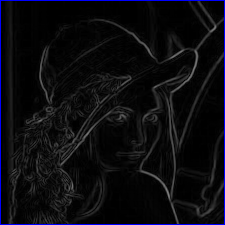

In [4]:
display(newimg)